## 1. Load Required Libraries

In [10]:
import src.util as utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## 2. Load Configuration File

In [11]:
config = utils.load_config()

## 3. Load Train and Valid Set

In [12]:
def load_train_feng(params: dict) -> pd.DataFrame:
    # Load train set
    x_train = utils.pickle_load(params["train_feng_set_path"][0])
    y_train = utils.pickle_load(params["train_feng_set_path"][1])

    return x_train, y_train

def load_valid(params: dict) -> pd.DataFrame:
    # Load valid set
    x_valid = utils.pickle_load(params["valid_feng_set_path"][0])
    y_valid = utils.pickle_load(params["valid_feng_set_path"][1])

    return x_valid, y_valid

def load_test(params: dict) -> pd.DataFrame:
    # Load tets set
    x_test = utils.pickle_load(params["test_feng_set_path"][0])
    y_test = utils.pickle_load(params["test_feng_set_path"][1])

    return x_test, y_test

In [13]:
x_train, y_train = load_train_feng(config)
x_valid, y_valid = load_valid(config)
x_test, y_test = load_test(config)

## 4. Training Model

In [14]:
dtc = DecisionTreeClassifier()

In [15]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
x_train

,Temperature[C],Humidity[%],Pressure[hPa],PM1.0,TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol
0,28.170,43.68,937.321,1.85,125,400,12793,20595
24184,19.584,49.22,938.715,1.58,1159,400,12933,19435
14473,24.590,53.35,938.699,1.79,1243,415,12906,19414
14472,24.570,53.35,938.740,1.57,1212,405,12898,19435
14471,12.353,51.77,938.771,1.57,1124,408,12877,19442
...,...,...,...,...,...,...,...,...
7517,26.220,46.59,937.422,1.74,75,400,12784,20638
7795,18.664,46.07,937.508,2.25,88,400,12826,20683
7642,18.882,47.74,937.418,1.35,177,431,12764,20540
7583,26.538,39.05,937.565,2.24,57,427,12850,20728


[Text(0.7578125, 0.9615384615384616, 'TVOC[ppb] <= 217.5\ngini = 0.496\nsamples = 18302\nvalue = [9964, 8338]'),
 Text(0.6119791666666666, 0.8846153846153846, 'Raw H2 <= 13143.5\ngini = 0.229\nsamples = 11289\nvalue = [9800, 1489]'),
 Text(0.4453125, 0.8076923076923077, 'TVOC[ppb] <= 209.5\ngini = 0.005\nsamples = 7689\nvalue = [7670, 19]'),
 Text(0.3619791666666667, 0.7307692307692307, 'Raw H2 <= 13140.5\ngini = 0.001\nsamples = 7593\nvalue = [7591, 2]'),
 Text(0.3203125, 0.6538461538461539, 'gini = 0.0\nsamples = 7507\nvalue = [7507, 0]'),
 Text(0.4036458333333333, 0.6538461538461539, 'Temperature[C] <= 2.193\ngini = 0.045\nsamples = 86\nvalue = [84, 2]'),
 Text(0.3619791666666667, 0.5769230769230769, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4453125, 0.5769230769230769, 'gini = 0.0\nsamples = 84\nvalue = [84, 0]'),
 Text(0.5286458333333334, 0.7307692307692307, 'Raw H2 <= 13131.5\ngini = 0.291\nsamples = 96\nvalue = [79, 17]'),
 Text(0.4869791666666667, 0.6538461538461539, 

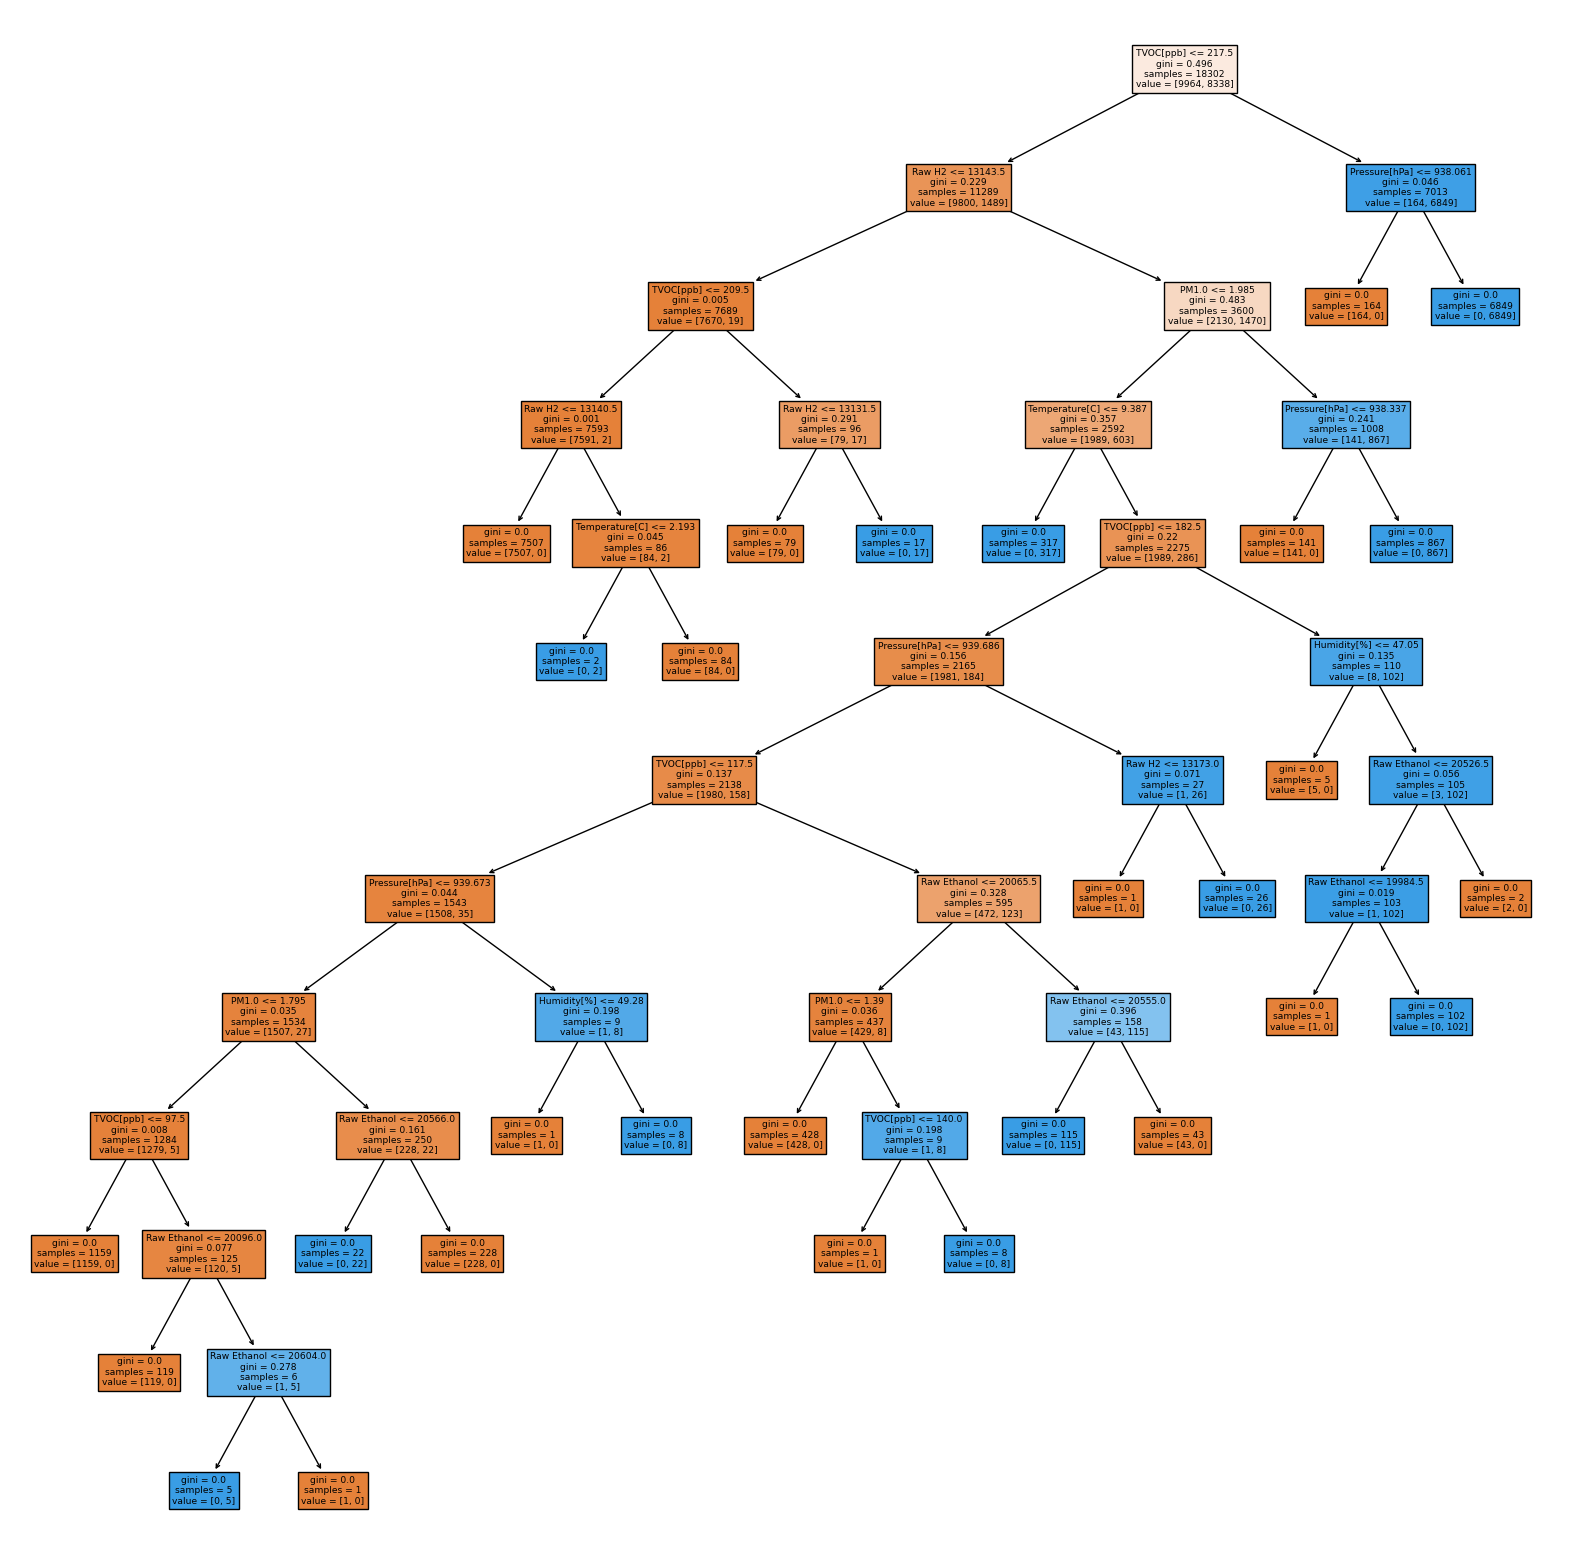

In [17]:
fig, ax = plt.subplots(figsize=(20,20)) 
tree.plot_tree(dtc, filled = True, ax = ax, feature_names = dtc.feature_names_in_)

## 5. Evaluation and Metrics

In [18]:
y_pred = dtc.predict(x_valid)

In [19]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.96      2681
           1       1.00      0.97      0.99      6713

    accuracy                           0.98      9394
   macro avg       0.97      0.98      0.97      9394
weighted avg       0.98      0.98      0.98      9394



In [20]:
y_pred = dtc.predict(x_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2681
           1       1.00      0.98      0.99      6714

    accuracy                           0.98      9395
   macro avg       0.97      0.98      0.98      9395
weighted avg       0.98      0.98      0.98      9395



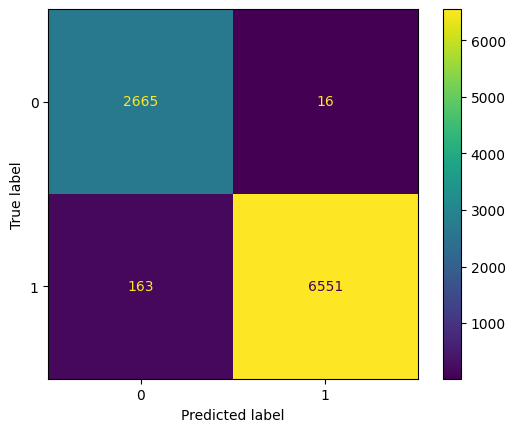

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## 6. Dump Model Object

In [23]:
utils.pickle_dump(dtc, config["production_model_path"])